# Roll the dice!


This is an example of probabilistic programming with dices and bets.

In [1]:
import torch
from torch.distributions import Multinomial
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  # Figure size

## Model a dice
Lets model a 6-faced dice or cube. Each face have the same probability of appearing when rolling the dice

In [3]:
# Dice properties
dice_faces = 6
dice_probs = torch.ones(dice_faces)  # All faces have the same probability
dice_faces_values = torch.arange(1,1+dice_faces, dtype=torch.float).reshape(dice_faces,1)  # Column Vector

### Test the dice

In [4]:
# Simulation parameters
n_dices = 1
n_rolls = 1000000  # Number of simulations to perform

In [5]:
# Distribution
roll_dist = Multinomial(n_dices, dice_probs)
samples = roll_dist.sample(torch.tensor([n_rolls]))  # Face count 
values = samples.mm(dice_faces_values).squeeze(1)  # Sum of the dice aces

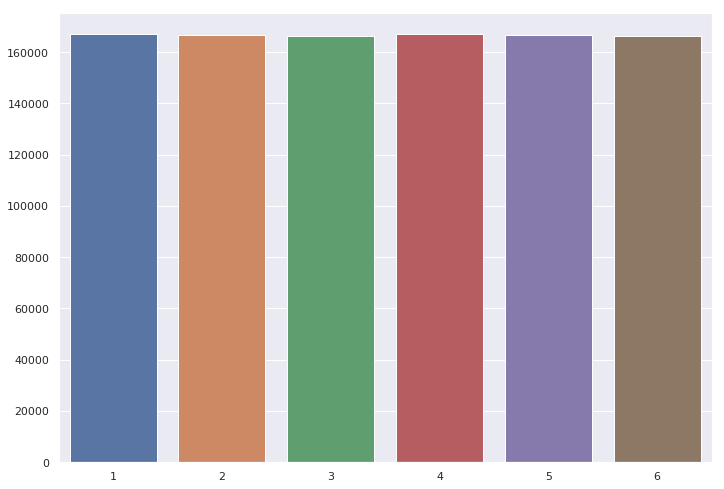

In [6]:
unique_values = sorted(values.unique().int().tolist())
counts = torch.histc(values, bins=len(unique_values))
sns.barplot(
    x=unique_values,
    y=counts.int()
)

In [7]:
print("Value\t Probability")
for value, prob in zip(unique_values, counts/(torch.sum(counts))):
    print(" {}\t {:.4f}".format(value, prob))

Value	 Probability
 1	 0.1669
 2	 0.1667
 3	 0.1664
 4	 0.1670
 5	 0.1666
 6	 0.1664


When the number of simulations is big enough, we see all the faces have the same probability of appearing.

## A 2-dice problem

We are going to roll 2 dices and sum the result of the faces. Which number should we bet?

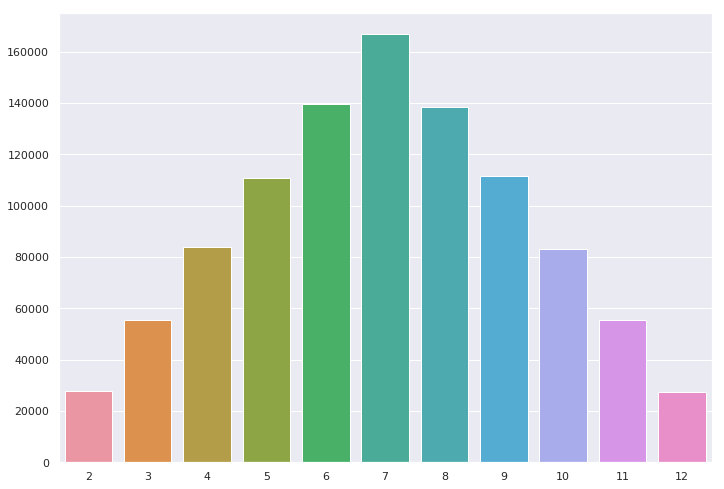

In [8]:
# Simulation parameters
n_dices = 2
n_rolls = 1000000  # Number of simulations to perform

# Distribution
roll_dist = Multinomial(n_dices, dice_probs)
samples = roll_dist.sample(torch.tensor([n_rolls]))  # Face count 
values = samples.mm(dice_faces_values).squeeze(1)  # Sum of the dice aces

unique_values = sorted(values.unique().int().tolist())
counts = torch.histc(values, bins=len(unique_values))
sns.barplot(
    x=unique_values,
    y=counts.int()
)

In [9]:
print("Value\t Probability")
for value, prob in zip(unique_values, counts/(torch.sum(counts))):
    print(" {}\t {:.4f}".format(value, prob))

Value	 Probability
 2	 0.0276
 3	 0.0553
 4	 0.0839
 5	 0.1108
 6	 0.1394
 7	 0.1668
 8	 0.1384
 9	 0.1116
 10	 0.0832
 11	 0.0556
 12	 0.0274


Our best choice would be to bet to the 7.

## Generalization

We roll:
* 3 6-faced dices
* 2 12-faced dices
* A 20-faced dice
* A coin (head sums 1, tails sums 0), but 60% of times we get tails

Which number should we bet?

In [10]:
dices = {}

for faces, n in [(6,3), (12,2), (20,1), (2,1)]:
    dices[faces] = {
        'probs': torch.ones(faces),
        'face_values': torch.arange(1,1+faces, dtype=torch.float).reshape(faces,1),
        'n': n,
    }
# Disbalanced Coin
dices[2]['probs'] = torch.tensor([60.,40.])  # The coin is disbalanced
dices[2]['face_values'] = torch.tensor([[0.], [1.]])

In [11]:
%%time

# Simulation parameters

n_rolls = 10000000  # Number of simulations to perform

dice_rolls = []

# Probability Distributions
for k,v in dices.items():
    dist = Multinomial(v['n'], v['probs'])
    samples = dist.sample(torch.tensor([n_rolls]))  # Face count 
    dice_rolls.append(samples.mm(v['face_values']).squeeze(1))  # Sum of the dice faces
    
values = torch.stack(dice_rolls).sum(dim=0)
unique_values = sorted(values.unique().int().tolist())
counts = torch.histc(values, bins=len(unique_values))

CPU times: user 37.8 s, sys: 848 ms, total: 38.6 s
Wall time: 38 s


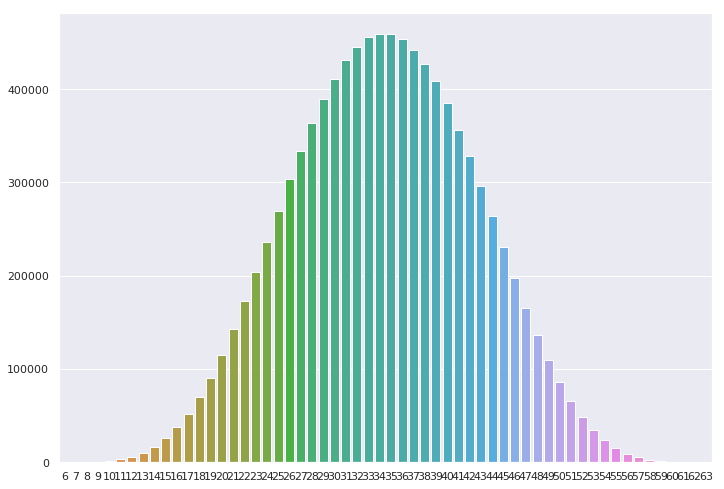

In [12]:
sns.barplot(
    x=unique_values,
    y=counts.int()
)

In [13]:
print("Value\t Probability (%)")
for value, prob in sorted(zip(unique_values, counts/(torch.sum(counts)))):
    print(" {}\t {:.8f}".format(value, prob))

Value	 Probability (%)
 6	 0.00000050
 7	 0.00000570
 8	 0.00002450
 9	 0.00006940
 10	 0.00016120
 11	 0.00032060
 12	 0.00060100
 13	 0.00103620
 14	 0.00168650
 15	 0.00256810
 16	 0.00374410
 17	 0.00520940
 18	 0.00697010
 19	 0.00904040
 20	 0.01147640
 21	 0.01425380
 22	 0.01724230
 23	 0.02042050
 24	 0.02360170
 25	 0.02697110
 26	 0.03034080
 27	 0.03335860
 28	 0.03638670
 29	 0.03892010
 30	 0.04109850
 31	 0.04307030
 32	 0.04451180
 33	 0.04555880
 34	 0.04589200
 35	 0.04588900
 36	 0.04532300
 37	 0.04422940
 38	 0.04273120
 39	 0.04084320
 40	 0.03849460
 41	 0.03567130
 42	 0.03287090
 43	 0.02956900
 44	 0.02635140
 45	 0.02306160
 46	 0.01973150
 47	 0.01655980
 48	 0.01366880
 49	 0.01098480
 50	 0.00865130
 51	 0.00659190
 52	 0.00487740
 53	 0.00347740
 54	 0.00235510
 55	 0.00155470
 56	 0.00093050
 57	 0.00054160
 58	 0.00028550
 59	 0.00013430
 60	 0.00005370
 61	 0.00002010
 62	 0.00000550
 63	 0.00000040


The less possible value is $6$ and the maximum is $63 = 3*6 + 2*12 + 20 + 1$.


In [14]:
print("Ranking")
print("Value\t Probability (%)")
for value, prob in sorted(
        zip(unique_values, counts/(torch.sum(counts))),
        key=lambda x: x[1],
        reverse=True
    ):
    print(" {}\t {:.8f}".format(value, prob))

Ranking
Value	 Probability (%)
 34	 0.04589200
 35	 0.04588900
 33	 0.04555880
 36	 0.04532300
 32	 0.04451180
 37	 0.04422940
 31	 0.04307030
 38	 0.04273120
 30	 0.04109850
 39	 0.04084320
 29	 0.03892010
 40	 0.03849460
 28	 0.03638670
 41	 0.03567130
 27	 0.03335860
 42	 0.03287090
 26	 0.03034080
 43	 0.02956900
 25	 0.02697110
 44	 0.02635140
 24	 0.02360170
 45	 0.02306160
 23	 0.02042050
 46	 0.01973150
 22	 0.01724230
 47	 0.01655980
 21	 0.01425380
 48	 0.01366880
 20	 0.01147640
 49	 0.01098480
 19	 0.00904040
 50	 0.00865130
 18	 0.00697010
 51	 0.00659190
 17	 0.00520940
 52	 0.00487740
 16	 0.00374410
 53	 0.00347740
 15	 0.00256810
 54	 0.00235510
 14	 0.00168650
 55	 0.00155470
 13	 0.00103620
 56	 0.00093050
 12	 0.00060100
 57	 0.00054160
 11	 0.00032060
 58	 0.00028550
 10	 0.00016120
 59	 0.00013430
 9	 0.00006940
 60	 0.00005370
 8	 0.00002450
 61	 0.00002010
 7	 0.00000570
 62	 0.00000550
 6	 0.00000050
 63	 0.00000040
